# Multiple Linear Regression

Multiple Linear Regression (MLR) is an extension of simple linear regression that allows you to model the relationship between two or more independent variables (predictors) and a dependent variable (target). The goal is to find the best-fitting linear relationship between the variables.

Consider sample datae **economics dataset** with the specified columns:  

| **Column Name**      | **Data Type** | **Description**                                                                 |
|-----------------------|---------------|---------------------------------------------------------------------------------|
| `Year`               | Integer       | Represents the year of observation. Useful for trend analysis.                 |
| `Month`              | Integer       | Represents the month of observation (1 = January, 2 = February, etc.).         |
| `Interest Rate`      | Float (%)     | The percentage at which banks lend money. Affects economic activity and growth.|
| `Unemployment Rate`  | Float (%)     | The percentage of the labor force actively seeking work but unemployed.        |
| `Index Price`        | Float         | A measure of the economic index value, e.g., stock market index.               |


The dataset represents economic indicators over time, focusing on how interest rates and unemployment rates influence an economic metric, the index price (e.g., stock market index or another economic index)


## import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Import the dataset

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
# Keep only required columns 
df.drop(columns=['year','month'], axis=1, inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


## Handle missing data

In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## Visualize the Index Price Trend

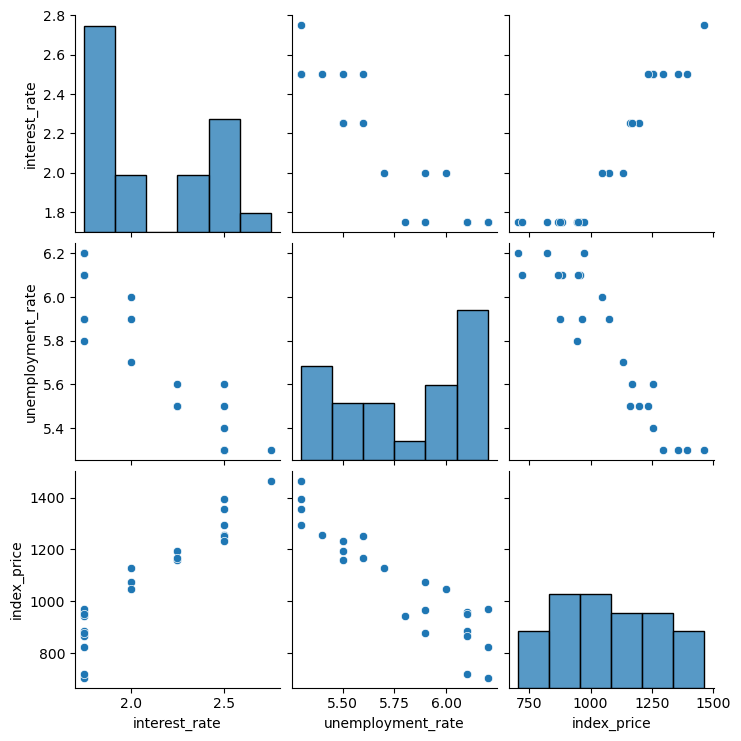

In [10]:
import seaborn as sns
sns.pairplot(df[["interest_rate", "unemployment_rate", "index_price"]])

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


**Insights:**
- Index Price vs. Interest Rate: Positive correlation (0.93) suggests a strong linear relationship.
- Index Price vs. Unemployment Rate: Negative correlation (-0.92) suggests a strong inverse linear relationship.


Text(0, 0.5, 'unemployment rate')

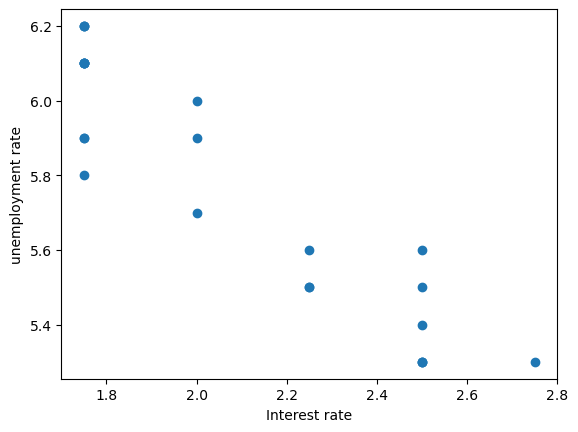

In [11]:
## Visualiza the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

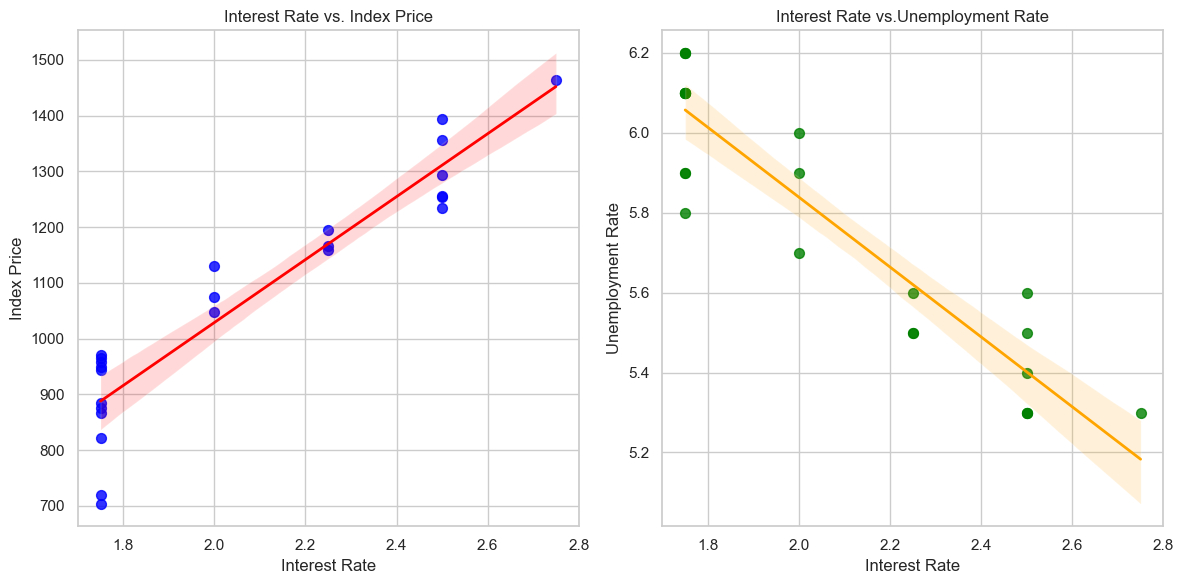

In [26]:
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid")

# Plot: Interest Rate vs. Index Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(
    x="interest_rate",
    y="index_price",
    data=df,
    scatter_kws={"color": "blue", "s": 50},
    line_kws={"color": "red", "lw": 2},
)
plt.title("Interest Rate vs. Index Price")
plt.xlabel("Interest Rate")
plt.ylabel("Index Price")

# Plot: Unemployment Rate vs. Index Price
plt.subplot(1, 2, 2)
sns.regplot(
    x="interest_rate",
    y="unemployment_rate",
    data=df,
    scatter_kws={"color": "green", "s": 50},
    line_kws={"color": "orange", "lw": 2},
)
plt.title("Interest Rate vs.Unemployment Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

The regplots above show the relationships:

1. **Interest Rate vs. Index Price**:
   - The red regression line suggests a positive relationship: as the interest rate increases, the index price also tends to increase.
   - This relationship appears relatively linear.

2. **Unemployment Rate vs. Index Price**:
   - The orange regression line indicates a negative relationship: as the unemployment rate decreases, the index price increases.
   - This relationship also seems fairly linear.

These visualizations help confirm linear trends between the independent variables (Interest Rate and Unemployment Rate) and the dependent variable (Index Price).

Above plot shows the relationship between Interest Rate and Unemployment Rate.

- The regression line indicates a negative relationship: as the interest rate increases, the unemployment rate tends to decrease.
- And the visualization suggests that these two variables are inversely correlated. ​

## Features and Target

In [12]:
# Features and Target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

## Split the dataset into test and training set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature Scaling
Scaling features to the same range (e.g., [0, 1] or standardization) can improve model convergence and performance.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [38]:
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [39]:
# Fit and Predict with Scaled Data
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled, y_train)

LinearRegression()

**Cross-Validation**

Cross-validation ensures the model generalizes well by splitting data into multiple training and validation subsets.

In [49]:
from sklearn.model_selection import cross_val_score

# Perform Cross-Validation
cv_scores = cross_val_score(regression, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')

print("Cross-Validation R-Squared Scores:", cv_scores)
print("Mean R-Squared Score:", cv_scores.mean())

Cross-Validation R-Squared Scores: [-4921.61331265 -7686.87497294 -5135.9962549 ]
Mean R-Squared Score: -5914.828180162386


In [46]:
# Predict with Scaled Data
y_scaled_pred = regression.predict(X_test_scaled)

## Evaluate the model's performance

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_squared_error=mean_squared_error(y_test,y_scaled_pred)
mean_squared_absolute_error=mean_absolute_error(y_test,y_scaled_pred)
root_mean_squared_error=np.sqrt(mean_squared_absolute_error)

from sklearn.metrics import r2_score
r2_score_val=r2_score(y_test,y_scaled_pred)

In [48]:
print(f'Mean Squared Error (MSE): {mean_squared_error}')
print(f'Mean Absolute Error (MAE):{mean_squared_absolute_error}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_error}')
print(f'R-squared (R²): {r2_score_val}')

Mean Squared Error (MSE): 8108.567426306604
Mean Absolute Error (MAE):73.80444932337097
Root Mean Squared Error (RMSE): 8.590951595915959
R-squared (R²): 0.7591371539010257


### Summary and Insights
**Performance:** The model explains 76% of the variance (R² = 0.76) and has moderate error (MSE = 8108.57 and MAE = 73.80). The model is relatively good, but there’s room for improvement in reducing the error.

## Assumption


In Linear Regression, there are several key assumptions that need to be met for the model to be valid and its results reliable.

### Linearity: 
The relationship between the dependent and independent variables is linear.

#### Scatter Plot: Actual vs. Predicted

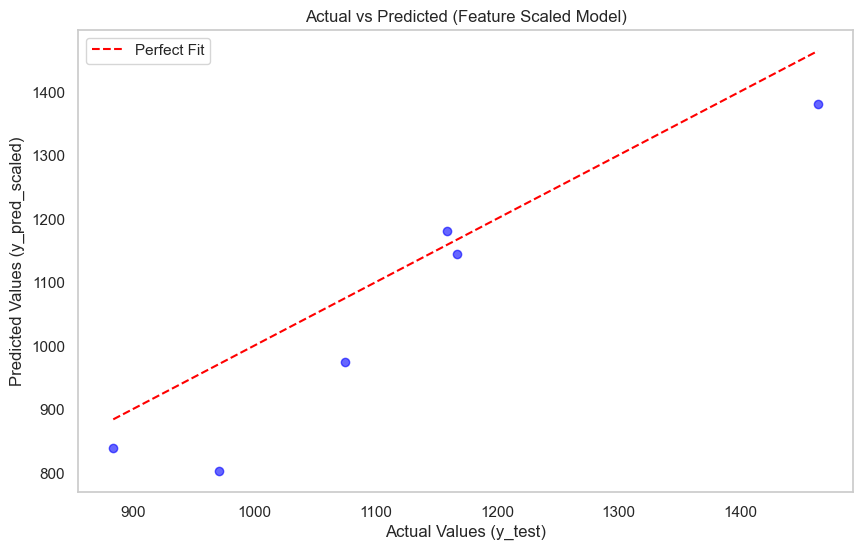

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_scaled_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.title("Actual vs Predicted (Feature Scaled Model)")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_scaled)")
plt.legend()
plt.grid()
plt.show()

Above plot helps visualize how well the predicted values align with the actual values. Ideally, the points should align closely along a 45-degree diagonal line (y = x).

**Interpretation :**
- If points are close to the red line, predictions are accurate.
- Significant deviations indicate areas where the model struggles.

### Residual Plot: Error Analysis

Residuals are the differences between actual and predicted values (y test - y pred). A good model should have residuals randomly scattered around zero.

In [52]:
residuals = y_test - y_scaled_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


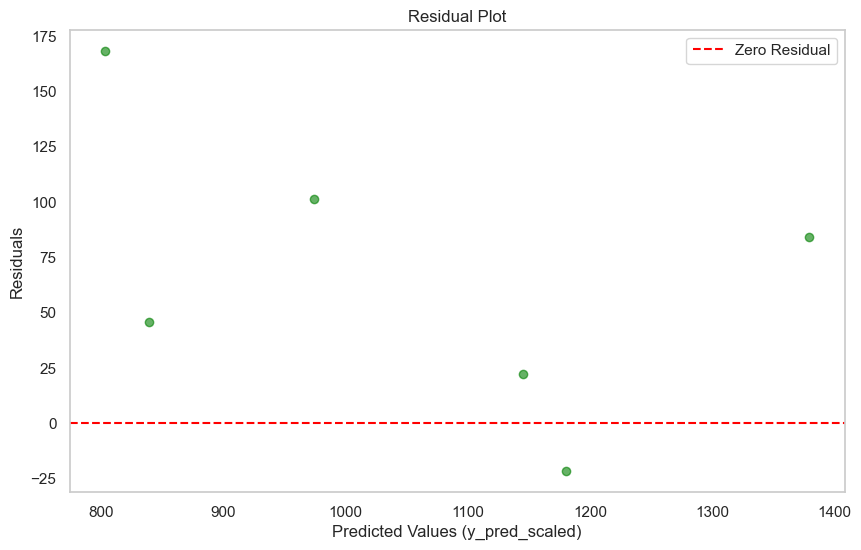

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_scaled_pred, residuals, color="green", alpha=0.6)
plt.axhline(0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residual Plot")
plt.xlabel("Predicted Values (y_pred_scaled)")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

**Interpretation:**
- Random scatter around zero indicates no patterns in errors (good fit).
- Patterns or systematic deviations suggest model misspecifications.

#### Residual Plot with Seaborn's displot

Using a displot (distribution plot) to visualize the residuals allows you to analyze the distribution of errors in your predictions. Ideally, residuals should follow a normal distribution, centered around zero.

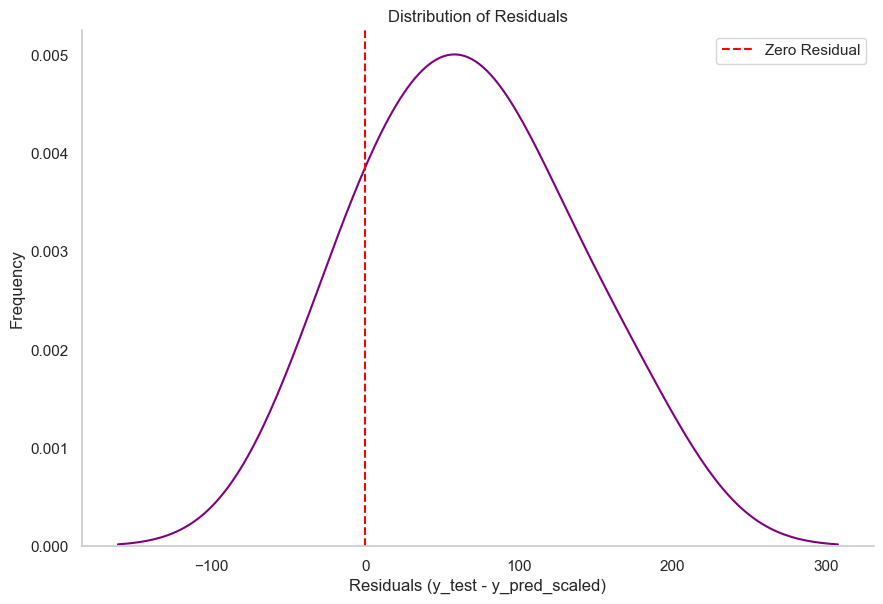

In [57]:
sns.displot(residuals, kind='kde', height=6, aspect=1.5, color="purple")
plt.axvline(0, color="red", linestyle="--", label="Zero Residual")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (y_test - y_pred_scaled)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

**Interpretation:**
- Symmetry: A symmetric distribution around zero indicates balanced predictions.
- Normality: A bell-shaped curve suggests residuals are normally distributed.
- Outliers: Large deviations from zero indicate areas where the model struggles.
- Skewness: If the distribution is skewed, it could imply model bias.


## OLS Linear Regression

In [58]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train_scaled).fit()

In [59]:
model.summary()

c:\Users\satee\anaconda3\envs\gen_ai\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                       0.754
Time:                        21:46:55   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
print(regression.coef_)

[  88.27275507 -116.25716066]


- Multiple Linear Regression is useful when you have more than one independent variable and want to model their relationship with a dependent variable.
- After fitting the model, it's important to evaluate its performance using metrics like R², MSE, and residual plots. 
- Checking for multicollinearity among features and ensuring the assumptions of the model are met is essential for achieving optimal results.

